In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math
import pandas_datareader as web

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore')

In [2]:
def ETL_d(path):
    df = pd.read_csv(path)
    df.set_index(df.iloc[:,0],inplace=True)
    df.index = pd.to_datetime(df.index)
    freeze=True
    df.dropna(inplace=True)
    df.parse_dates=True
    df =pd.DataFrame(df,columns =['close'])
    return df

In [3]:
df = ETL_d(r'C:\Users\kelvin\Downloads\AALL.csv')
print(df.shape)
df.tail()

(4447, 1)


,close
date,
2023-05-22,14.38
2023-05-23,14.07
2023-05-24,13.80
2023-05-25,14.38
2023-05-26,14.35


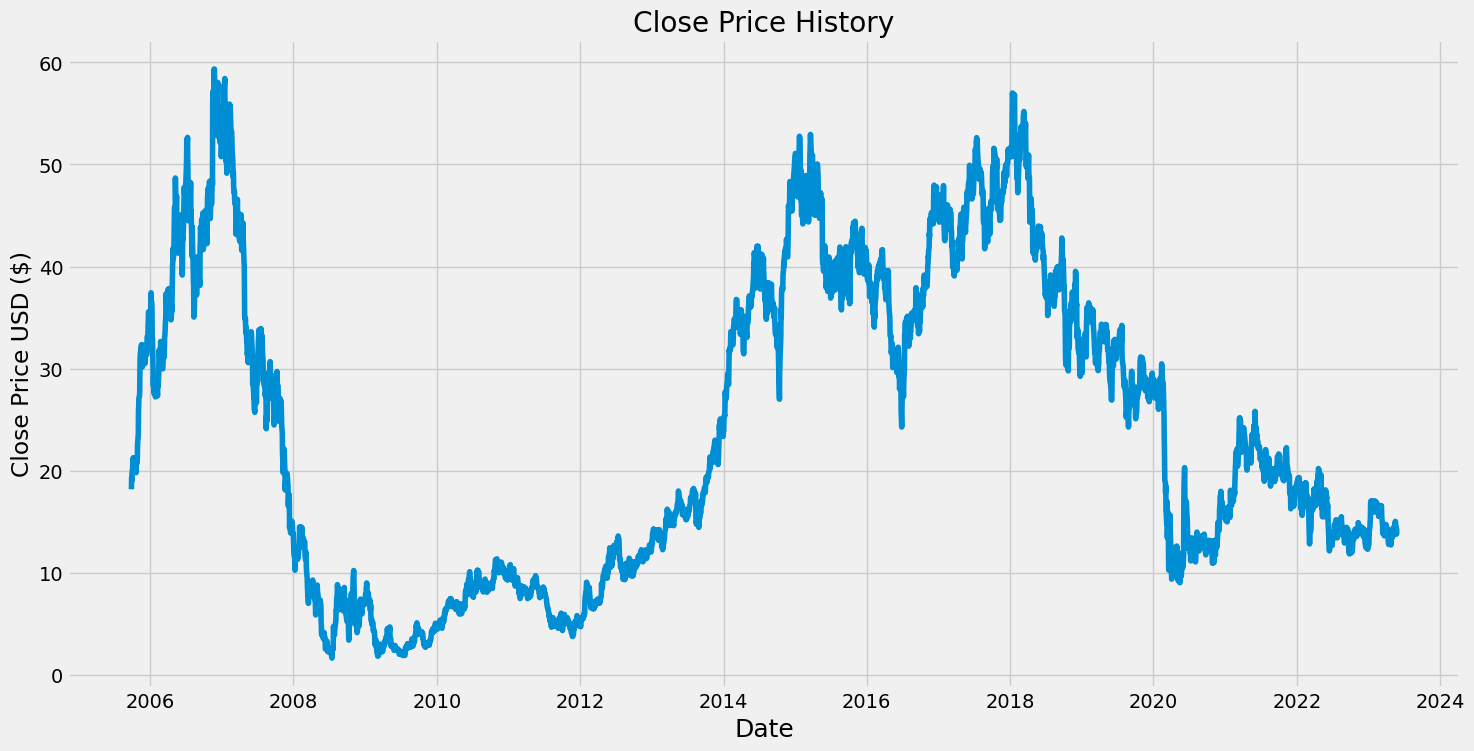

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel("Close Price USD ($)")
plt.show()

In [5]:
dataset = df.filter(['close'])
dataset

,close
date,
2005-09-27,18.1920
2005-09-28,19.3231
2005-09-29,19.0498
2005-09-30,19.8038
2005-10-03,20.2657
...,...
2023-05-22,14.3800
2023-05-23,14.0700
2023-05-24,13.8000


In [6]:
dataset = dataset.values
dataset

array([[18.192 ],
       [19.3231],
       [19.0498],
       ...,
       [13.8   ],
       [14.38  ],
       [14.35  ]])

In [7]:
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

3558

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform((dataset))
scaled_data

array([[0.28664756],
       [0.30625846],
       [0.30152001],
       ...,
       [0.21049949],
       [0.22055547],
       [0.22003533]])

In [9]:
train_data = scaled_data[0:training_data_len,:]
train_data

array([[0.28664756],
       [0.30625846],
       [0.30152001],
       ...,
       [0.49974427],
       [0.48125686],
       [0.46639828]])

In [10]:
x_train = []
y_train =[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <=61:
        print(x_train)
        print(y_train)
        print()

[array([0.28664756, 0.30625846, 0.30152001, 0.31459279, 0.32260117,
       0.33338708, 0.33404072, 0.34025116, 0.3332241 , 0.33420543,
       0.33044657, 0.32685069, 0.32603408, 0.33518502, 0.3320798 ,
       0.32243819, 0.32064025, 0.3147575 , 0.33011889, 0.33583866,
       0.33077252, 0.33600164, 0.3399252 , 0.36182298, 0.37457154,
       0.3801266 , 0.42147403, 0.42670315, 0.44190155, 0.44402718,
       0.45219853, 0.48275832, 0.50727238, 0.51626035, 0.52279848,
       0.52492237, 0.5203469 , 0.5321124 , 0.51135893, 0.49403489,
       0.50236922, 0.51119422, 0.508089  , 0.51724168, 0.50890735,
       0.52018392, 0.53145876, 0.53145876, 0.49991764, 0.52067285,
       0.52606667, 0.52132649, 0.52492237, 0.52296145, 0.51462712,
       0.51936557, 0.52083756, 0.54567757, 0.54731254, 0.54845511])]
[0.5679030325727195]

[array([0.28664756, 0.30625846, 0.30152001, 0.31459279, 0.32260117,
       0.33338708, 0.33404072, 0.34025116, 0.3332241 , 0.33420543,
       0.33044657, 0.32685069, 0.326

In [11]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [12]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(3498, 60, 1)

In [13]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [15]:
model.fit(x_train,y_train,batch_size=1,epochs=20)

Epoch 1/20
3498/3498 [==============================] - 148s 40ms/step - loss: 0.0013
Epoch 2/20
3498/3498 [==============================] - 141s 40ms/step - loss: 5.2569e-04
Epoch 3/20
3498/3498 [==============================] - 142s 41ms/step - loss: 4.6071e-04
Epoch 4/20
3498/3498 [==============================] - 142s 40ms/step - loss: 4.0118e-04
Epoch 5/20
3498/3498 [==============================] - 137s 39ms/step - loss: 3.9872e-04
Epoch 6/20
3498/3498 [==============================] - 137s 39ms/step - loss: 3.5557e-04
Epoch 7/20
3498/3498 [==============================] - 137s 39ms/step - loss: 3.5973e-04
Epoch 8/20
3498/3498 [==============================] - 137s 39ms/step - loss: 3.4618e-04
Epoch 9/20
3498/3498 [==============================] - 138s 39ms/step - loss: 3.6065e-04
Epoch 10/20
3498/3498 [==============================] - 138s 39ms/step - loss: 3.2272e-04
Epoch 11/20
3498/3498 [==============================] - 136s 39ms/step - loss: 3.4235e-04
Epoch 12/20


In [16]:
test_data = scaled_data[training_data_len - 60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [17]:
x_test = np.array(x_test)

In [18]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [19]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

28/28 [==============================] - 4s 25ms/step


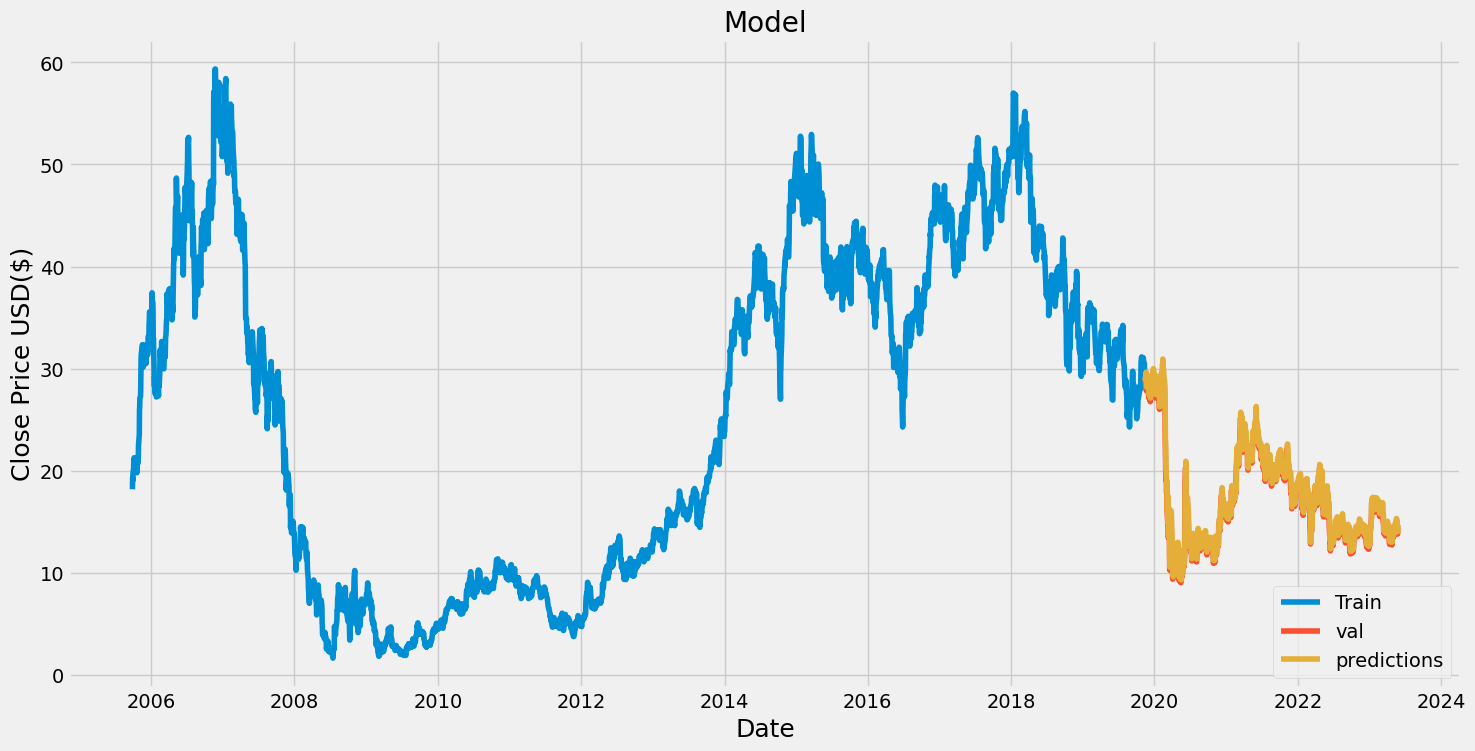

In [20]:
import warnings
warnings.simplefilter('ignore')

train = df[:training_data_len]
valid = df[training_data_len:]
valid['predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show()

In [21]:
valid

,close,predictions
date,,
2019-11-14,28.6692,28.849184
2019-11-15,28.7588,29.050297
2019-11-18,28.4998,29.148146
2019-11-19,29.1873,28.869181
2019-11-20,28.1311,29.661396
...,...,...
2023-05-22,14.3800,15.090693
2023-05-23,14.0700,14.617874
2023-05-24,13.8000,14.313405


In [22]:
valid.head(10)

,close,predictions
date,,
2019-11-14,28.6692,28.849184
2019-11-15,28.7588,29.050297
2019-11-18,28.4998,29.148146
2019-11-19,29.1873,28.869181
2019-11-20,28.1311,29.661396
2019-11-21,27.8321,28.407488
2019-11-22,28.5795,28.198732
2019-11-25,28.8884,29.032946
2019-11-26,28.9482,29.316267


In [23]:
valid.tail(10)

,close,predictions
date,,
2023-05-15,14.28,14.286307
2023-05-16,14.20,14.568428
2023-05-17,14.91,14.464740
2023-05-18,15.05,15.253131
2023-05-19,14.82,15.330855
2023-05-22,14.38,15.090693
2023-05-23,14.07,14.617874
2023-05-24,13.80,14.313405
2023-05-25,14.38,14.042345


              close  predictions  Deviations
date                                        
2019-11-14  28.6692    28.849184    0.179984
2019-11-15  28.7588    29.050297    0.291497
2019-11-18  28.4998    29.148146    0.648346
2019-11-19  29.1873    28.869181   -0.318119
2019-11-20  28.1311    29.661396    1.530296
...             ...          ...         ...
2023-05-22  14.3800    15.090693    0.710693
2023-05-23  14.0700    14.617874    0.547874
2023-05-24  13.8000    14.313405    0.513405
2023-05-25  14.3800    14.042345   -0.337655
2023-05-26  14.3500    14.698861    0.348861

[889 rows x 3 columns]


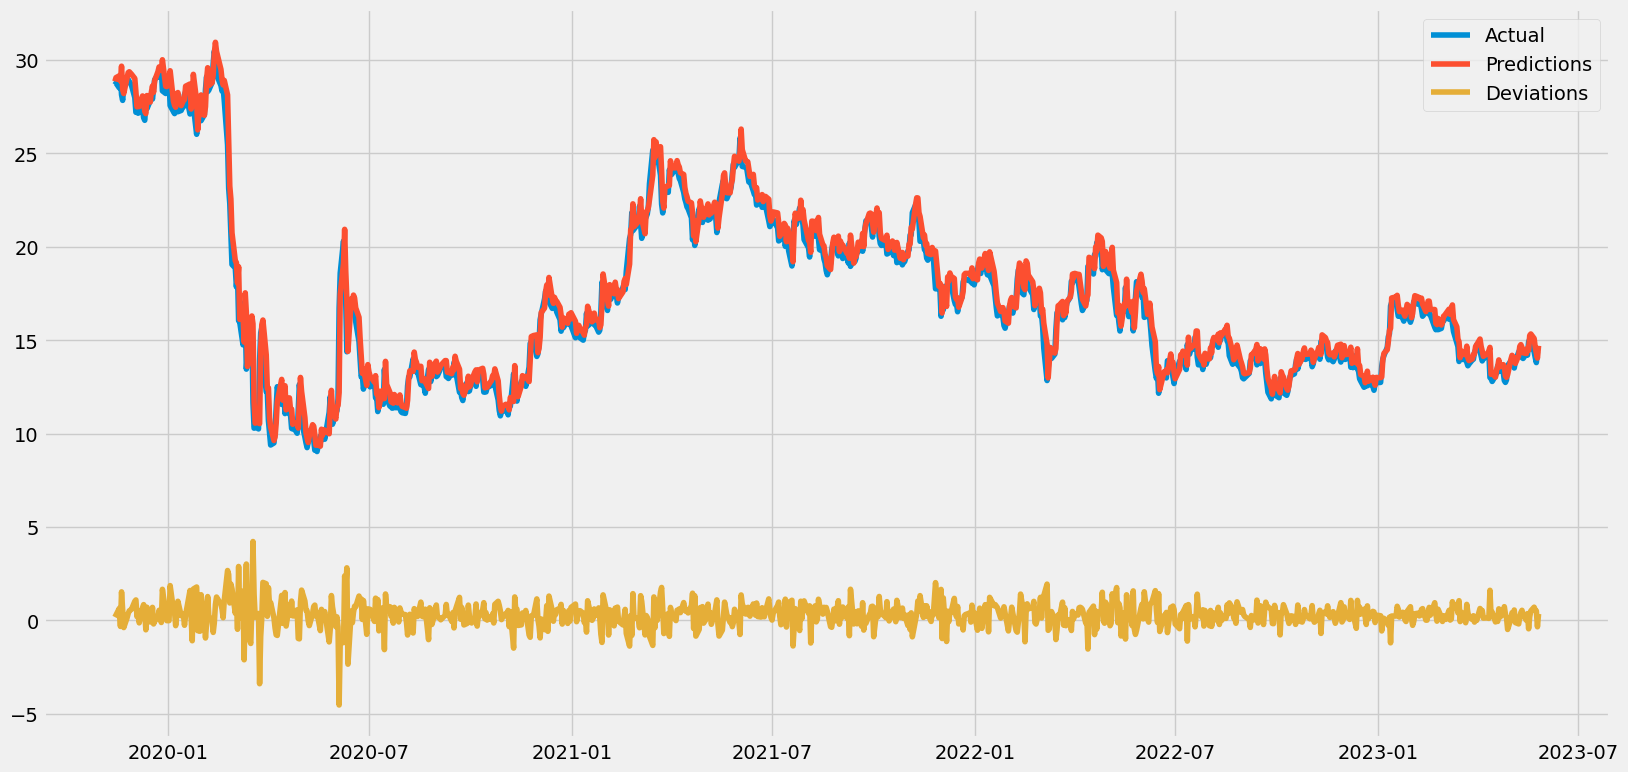

In [25]:
def cal_diff(fs):
    return fs[1] -  fs[0]
valid['Deviations'] = valid[['close','predictions']].apply(cal_diff,axis=1)

print(valid)

plt.figure(figsize=(18,9))
plt.plot(valid['close'],label='Actual')
plt.plot(valid['predictions'],label= 'Predictions')
plt.plot(valid['Deviations'],label= 'Deviations')
plt.legend(loc='best')
plt.show()

In [26]:
k=np.where(valid['Deviations']>1,1,0)
kk=pd.DataFrame(k).value_counts()
print('Deviations Greater than 1.0 value:',kk[1])
print('Deviations Less than 1.0 value:',kk[0])

Deviations Greater than 1.0 value: 98
Deviations Less than 1.0 value: 791


In [27]:
for i,j in valid.iterrows():
    valid.loc[i,"Div"] = j["predictions"] - j['close']
valid

,close,predictions,Deviations,Div
date,,,,
2019-11-14,28.6692,28.849184,0.179984,0.179984
2019-11-15,28.7588,29.050297,0.291497,0.291497
2019-11-18,28.4998,29.148146,0.648346,0.648346
2019-11-19,29.1873,28.869181,-0.318119,-0.318119
2019-11-20,28.1311,29.661396,1.530296,1.530296
...,...,...,...,...
2023-05-22,14.3800,15.090693,0.710693,0.710693
2023-05-23,14.0700,14.617874,0.547874,0.547874
2023-05-24,13.8000,14.313405,0.513405,0.513405


0.8
0.26
0.32

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

mse =1.0078716015729179
mape = 0.04693310877390862

In [29]:
mse= mean_squared_error(valid['close'],valid['predictions'])
mape=mean_absolute_percentage_error(valid['close'],valid['predictions'])
print('Mean Absolute Percentage Error',mape)
print('Mean Square Error',mse)

Mean Absolute Percentage Error 0.034239376332887886
Mean Square Error 0.5486475304804608
